In [304]:
import matplotlib.pyplot as plt
%matplotlib inline

In [305]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score

In [306]:
df = pd.read_csv("EcomCustomersWthNan.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [307]:
df.isna().any() 

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website          True
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 8 columns):
Email                   138 non-null object
Address                 138 non-null object
Avatar                  138 non-null object
Avg. Session Length     138 non-null float64
Time on App             138 non-null float64
Time on Website         113 non-null float64
Length of Membership    138 non-null float64
Yearly Amount Spent     138 non-null float64
dtypes: float64(5), object(3)
memory usage: 8.7+ KB


In [309]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O')]

In [310]:
df = df.select_dtypes(include = 'float64')
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [311]:
df = df.assign(missing=np.nan)
df.missing[df['Time on Website'].isna()] = df['Yearly Amount Spent']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 6 columns):
Avg. Session Length     138 non-null float64
Time on App             138 non-null float64
Time on Website         113 non-null float64
Length of Membership    138 non-null float64
Yearly Amount Spent     138 non-null float64
missing                 25 non-null float64
dtypes: float64(6)
memory usage: 6.5 KB


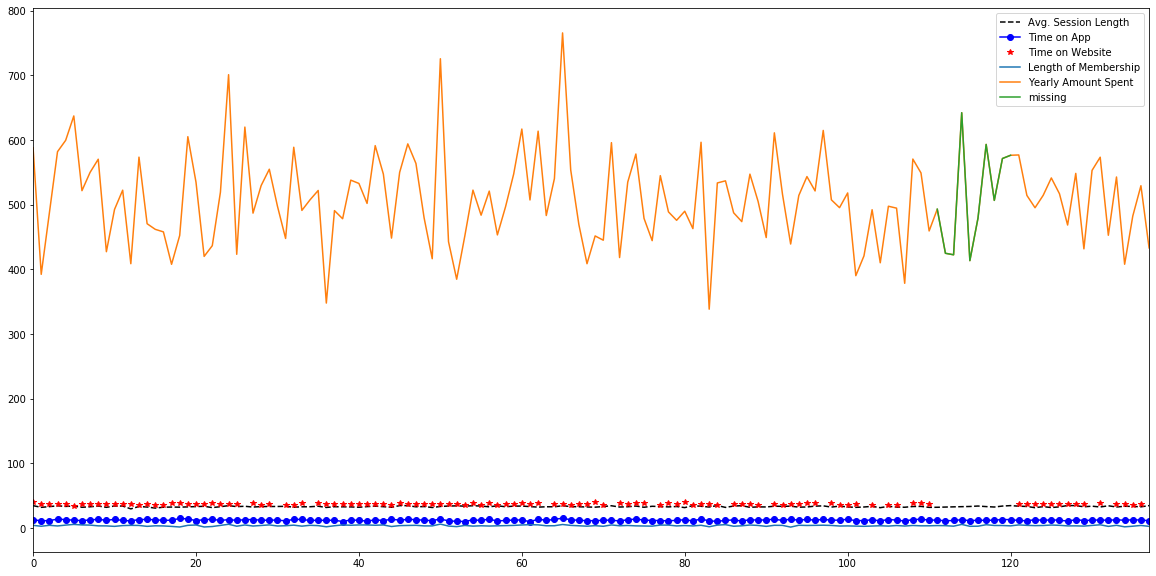

In [312]:
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

## Заполнение средним

In [313]:
df = df.assign(FillMean=df['Time on Website'].fillna(df['Time on Website'].mean()))

In [314]:
df = df.assign(FillMedian=df['Time on Website'].fillna(df['Time on Website'].median()))

In [315]:
df.isna().any() 

Avg. Session Length     False
Time on App             False
Time on Website          True
Length of Membership    False
Yearly Amount Spent     False
missing                  True
FillMean                False
FillMedian              False
dtype: bool

In [316]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,missing,FillMean,FillMedian
0,34.497268,12.655651,39.577668,4.082621,587.951054,NaN,39.577668,39.577668
1,31.926272,11.109461,37.268959,2.664034,392.204933,NaN,37.268959,37.268959
2,33.000915,11.330278,37.110597,4.104543,487.547505,NaN,37.110597,37.110597
3,34.305557,13.717514,36.721283,3.120179,581.852344,NaN,36.721283,36.721283
4,33.330673,12.795189,37.536653,4.446308,599.406092,NaN,37.536653,37.536653


### Заполнение пропусков скользящим средним / медианой

In [317]:
# imputing using the rolling average
df = df.assign(RollingMean=df['Time on Website'].fillna(df['Time on Website'].rolling(24,min_periods=1,).mean()))
# imputing using the rolling median
df = df.assign(RollingMedian=df['Time on Website'].fillna(df['Time on Website'].rolling(24,min_periods=1,).median()))# imputing using the median

In [318]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,missing,FillMean,FillMedian,RollingMean,RollingMedian
0,34.497268,12.655651,39.577668,4.082621,587.951054,NaN,39.577668,39.577668,39.577668,39.577668
1,31.926272,11.109461,37.268959,2.664034,392.204933,NaN,37.268959,37.268959,37.268959,37.268959
2,33.000915,11.330278,37.110597,4.104543,487.547505,NaN,37.110597,37.110597,37.110597,37.110597
3,34.305557,13.717514,36.721283,3.120179,581.852344,NaN,36.721283,36.721283,36.721283,36.721283
4,33.330673,12.795189,37.536653,4.446308,599.406092,NaN,37.536653,37.536653,37.536653,37.536653


### Заполнение пропусков с использованием интерполяции

In [322]:
#df = df.assign(InterpolatePoly5=df['Time on Website'].interpolate(method='polynomial', order=5)) 
#df = df.assign(InterpolatePoly7=df['Time on Website'].interpolate(method='polynomial', order=7))
df = df.assign(InterpolateLinear=df['Time on Website'].interpolate(method='linear'))
#df= df.assign(InterpolateQuadratic=df['Time on Website'].interpolate(method='quadratic'))
#df= df.assign(InterpolateCubic=df['Time on Website'].interpolate(method='cubic'))
#df= df.assign(InterpolateSLinear=df['Time on Website'].interpolate(method='slinear'))
#df= df.assign(InterpolateAkima=df['Time on Website'].interpolate(method='akima'))
df = df.assign(InterpolateSpline3=df['Time on Website'].interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df['Time on Website'].interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df['Time on Website'].interpolate(method='spline', order=5))

Часть интерполяции в комментариях, потому что возвращает df.isna().any() как True и после, results не отрабатывает и выходит ошибка "ValueError: Input contains NaN, infinity or a value too large for dtype('float64')".

In [323]:
df.isna().any()

Avg. Session Length     False
Time on App             False
Time on Website          True
Length of Membership    False
Yearly Amount Spent     False
missing                  True
FillMean                False
FillMedian              False
RollingMean             False
RollingMedian           False
InterpolateLinear       False
InterpolateSpline3      False
InterpolateSpline4      False
InterpolateSpline5      False
dtype: bool

In [324]:
results = [(method, r2_score(df['Yearly Amount Spent'], df[method])) for method in list(df)[6:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
3,RollingMedian,-43.562149894527636
1,FillMedian,-43.56141850250553
7,InterpolateSpline5,-43.56090180395759
0,FillMean,-43.56078418127318
2,RollingMean,-43.560245948112396
6,InterpolateSpline4,-43.559344960505356
5,InterpolateSpline3,-43.558650718900566
4,InterpolateLinear,-43.5527329346322


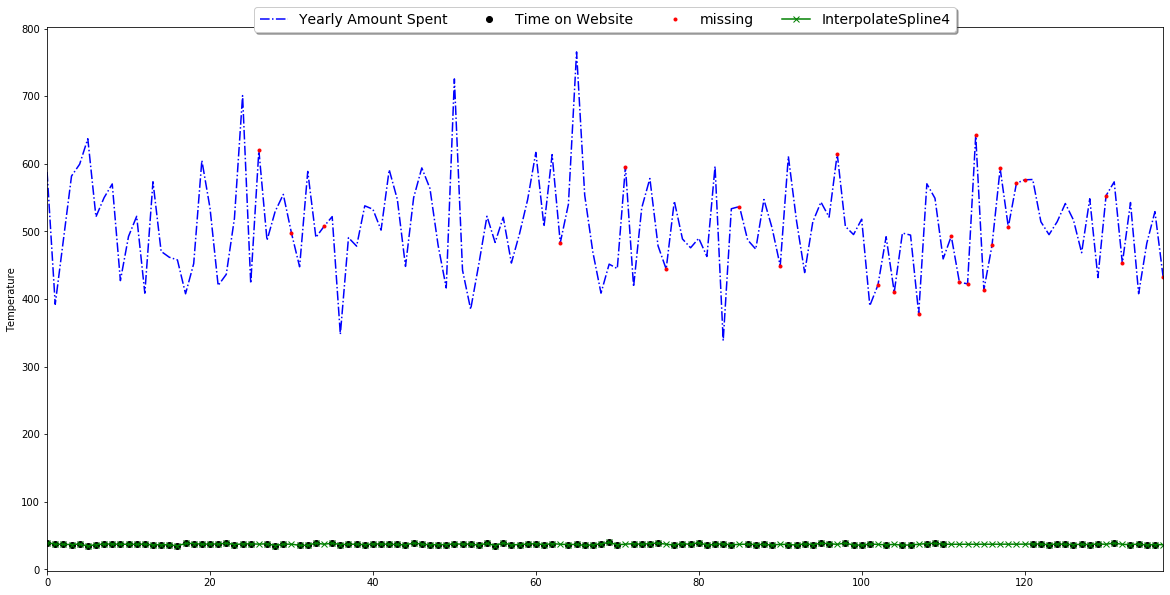

In [327]:
final_df= df[['Yearly Amount Spent', 'Time on Website', 'missing', 'InterpolateSpline4' ]]
final_df.plot(style=['b-.', 'ko', 'r.', 'gx-'], figsize=(20,10));
plt.ylabel('Temperature');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14} );